Olá, Thiago!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor v1 </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos seus cliente planos pré-pagos, Surf e Ultimate. O departamento comercial quer saber quais dos planos dão mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma primeira análise dos planos baseados em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018. O seu trabalho é analisar o comportamento dos clientes e determinar quais planos pré-pagos dão mais receita.

## Iniciando Lab

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# paleta de cores
cores_personalizadas = ["#005666", "#181f4c", "#60bcc6", "#8e0000", "#ffffff"]
sns.set_palette(cores_personalizadas)
sns.set_palette(sns.color_palette(cores_personalizadas))

In [2]:
# montando meu drive no colab
'''
# montando drive do google colab
from google.colab import drive
drive.mount('/content/drive')
'''

"\n# montando drive do google colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [3]:
# para uso da triple ten
'''
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')
'''

"\ndf_calls = pd.read_csv('/datasets/megaline_calls.csv')\ndf_internet = pd.read_csv('/datasets/megaline_internet.csv')\ndf_messages = pd.read_csv('/datasets/megaline_messages.csv')\ndf_plans = pd.read_csv('/datasets/megaline_plans.csv')\ndf_users = pd.read_csv('/datasets/megaline_users.csv')\n"


## Carregando dados

In [4]:
# Carregando os arquivos de dados em diferentes DataFrames
try:
    df_users = pd.read_csv('C:/my_workspace/triple_ten/project4/data/megaline_users.csv')
    df_plans = pd.read_csv('C:/my_workspace/triple_ten/project4/data/megaline_plans.csv')
    df_messages = pd.read_csv('C:/my_workspace/triple_ten/project4/data/megaline_messages.csv')
    df_internet = pd.read_csv('C:/my_workspace/triple_ten/project4/data/megaline_internet.csv')
    df_calls = pd.read_csv('C:/my_workspace/triple_ten/project4/data/megaline_calls.csv')
except:
    df_users = pd.read_csv('/content/drive/MyDrive/1drive_colab/megaline_users.csv')
    df_plans = pd.read_csv('/content/drive/MyDrive/1drive_colab/megaline_plans.csv')
    df_messages = pd.read_csv('/content/drive/MyDrive/1drive_colab/megaline_messages.csv')
    df_internet = pd.read_csv('/content/drive/MyDrive/1drive_colab/megaline_internet.csv')
    df_calls = pd.read_csv('/content/drive/MyDrive/1drive_colab/megaline_calls.csv')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! O estudante carregou corretamente os conjuntos de dados.
</div>

## Informações gerais

## Usuários

### Explorando df_users.

In [5]:
# verificando nomes das colunas
df_users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

In [6]:
# tamanho
df_users.shape

(500, 8)

In [7]:
# descrição
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [8]:
# informações gerais
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# cabeçalho
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [10]:
# sample
df_users.sample(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
140,1140,Randolph,Graves,53,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-26,surf,NaN
210,1210,Shanae,Carrillo,30,"Oklahoma City, OK MSA",2018-06-01,surf,NaN
157,1157,Luciano,Sheppard,63,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-02,surf,NaN
366,1366,Rod,Huff,62,"Cincinnati, OH-KY-IN MSA",2018-07-30,surf,NaN
308,1308,Samara,Monroe,46,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",2018-11-22,surf,NaN
11,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaN
410,1410,Wendell,Lloyd,46,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-06,surf,NaN
335,1335,Gail,Coleman,61,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-02,surf,NaN
443,1443,Genaro,Quinn,58,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-11,surf,NaN
279,1279,Neal,Duke,27,"Baton Rouge, LA MSA",2018-02-05,ultimate,NaN


In [11]:
# rodapé
df_users.tail()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN


In [12]:
# duplicados?
df_users.duplicated().sum()

0

In [13]:
# procurando por nulos
df_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [14]:
# transformando reg_date para date
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
# conferindo
df_users['reg_date'].head()

0   2018-12-24
1   2018-08-13
2   2018-10-21
3   2018-01-28
4   2018-05-23
Name: reg_date, dtype: datetime64[ns]

In [15]:
# mais informações
df_users['plan'].value_counts(normalize=True)

surf        0.678
ultimate    0.322
Name: plan, dtype: float64

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sugiro não executar o método `value_counts()` em todo o conjunto de dados e sim quando você tiver a intenção de estudar a distribuição de um atributo específico, pois ele será mais informativo. Exemplo:
        
        df_users['plan'].value_counts(normalize=True)
</div>

<div class="alert alert-block alert-info">
<b>Comentário do Aluno.</b> <a class="tocSkip"></a>

Entendi o seu comentário aqui e usarei a sua sugestão nos meus próximos notebooks. Obrigado!

</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2</b> <a class="tocSkip"></a>

Perfeito!
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. O estudante executou corretamente as seguintes etapas:
- Analisou informações iniciais dos conjuntos de dados
- Verificou a existência de dados duplicados
- Transformou o tipo de dados das variáveis
</div>

### Criando coluna exited em df_users.

In [16]:
# criando coluna exited
df_users['exited'] = np.where(df_users['churn_date'].isna(), 0, 1)
# verificando...
df_users.loc[df_users['exited'] == 1].count()

user_id       34
first_name    34
last_name     34
age           34
city          34
reg_date      34
plan          34
churn_date    34
exited        34
dtype: int64

In [17]:
# calculando a proporção de clientes com evasão
total_clients = df_users.shape[0]
exited_clients = df_users['exited'].loc[df_users['exited'] == 1].count()
evasion = (exited_clients / total_clients) * 100
print(round(evasion, 2),f'% dos {total_clients} clientes sofreram churn.')

6.8 % dos 500 clientes sofreram churn.


### Resolvendo churn_date.

In [18]:
# usando fillna
df_users['churn_date'] = df_users['churn_date'].fillna("not exited")

In [19]:
# verificando
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,exited
224,1224,Kelly,Cole,74,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-06-28,ultimate,not exited,0
363,1363,Sandee,Lott,33,"Seattle-Tacoma-Bellevue, WA MSA",2018-01-05,ultimate,2018-08-16,1
470,1470,Gerald,Reese,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-04-21,surf,not exited,0
418,1418,Hal,Barnes,40,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-19,surf,not exited,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,not exited,0
355,1355,Digna,Tyson,57,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-07,surf,not exited,0
19,1019,Shizue,Landry,34,"Jacksonville, FL MSA",2018-01-16,surf,not exited,0
209,1209,Garret,Paul,63,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-28,surf,not exited,0
445,1445,Elodia,Donovan,71,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,ultimate,not exited,0
155,1155,Claude,Hahn,19,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-02-21,ultimate,not exited,0


In [20]:
# contando
df_users.value_counts()

user_id  first_name  last_name  age  city                                            reg_date    plan      churn_date  exited
1000     Anamaria    Bauer      45   Atlanta-Sandy Springs-Roswell, GA MSA           2018-12-24  ultimate  not exited  0         1
1329     Doyle       Nunez      65   Charleston-North Charleston, SC MSA             2018-08-25  ultimate  not exited  0         1
1342     Eugene      Patton     65   Indianapolis-Carmel-Anderson, IN MSA            2018-10-21  surf      not exited  0         1
1341     Kaila       Andrews    28   Chicago-Naperville-Elgin, IL-IN-WI MSA          2018-06-17  surf      not exited  0         1
1340     Vanna       Stanton    65   Dallas-Fort Worth-Arlington, TX MSA             2018-07-05  surf      not exited  0         1
                                                                                                                                ..
1161     Florance    Estrada    52   New York-Newark-Jersey City, NY-NJ-PA MSA       201

### Realizaremos as análises com user_id. Removendo first_name e last_name.

In [21]:
# removendo com drop
df_users = df_users.drop(['first_name', 'last_name'], axis=1)
# conferindo
df_users.head()

,user_id,age,city,reg_date,plan,churn_date,exited
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,not exited,0
1,1001,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,not exited,0
2,1002,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,not exited,0
3,1003,52,"Tulsa, OK MSA",2018-01-28,surf,not exited,0
4,1004,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,not exited,0


In [22]:
# reorganizando colunas
new_order = ['user_id', 'plan', 'exited', 'age', 'city', 'reg_date', 'churn_date']
df_users = df_users[new_order]
df_users.head()

,user_id,plan,exited,age,city,reg_date,churn_date
0,1000,ultimate,0,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,not exited
1,1001,surf,0,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,not exited
2,1002,surf,0,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,not exited
3,1003,surf,0,52,"Tulsa, OK MSA",2018-01-28,not exited
4,1004,surf,0,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,not exited


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! O estudante executou o pré-processamento dos dados.
</div>

### Enriquecendo os Dados.

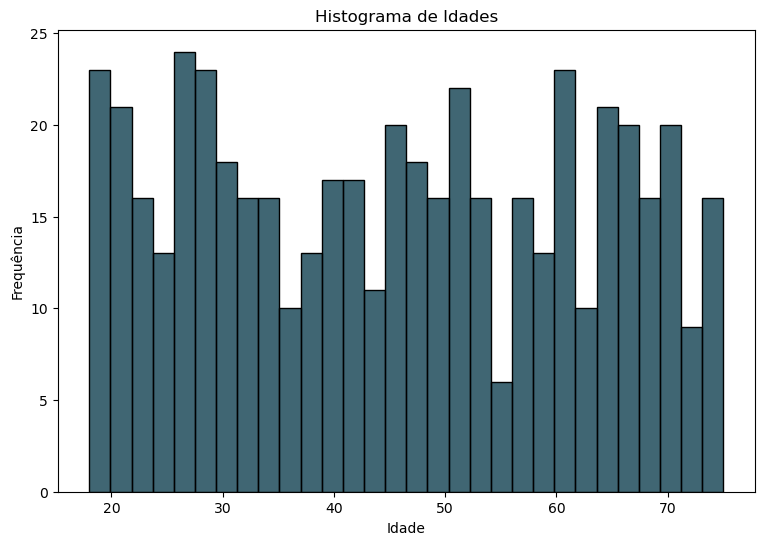

In [23]:
# distribuição de idades dos usuários
plt.figure(figsize=(9, 6))
sns.histplot(data=df_users, x='age', bins=30, color="#003344", edgecolor='k')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idades')
plt.show()

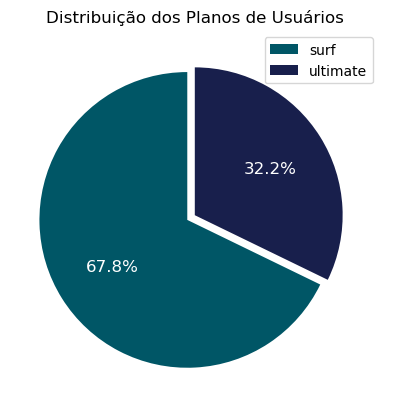

In [24]:
# gráfico informativo dos planos
plan_counts = df_users['plan'].value_counts()
colors = ["#005666", "#181f4c"]
labels = plan_counts.index
sizes = plan_counts.values

explode = (0.06, 0)
 
fig, ax = plt.subplots()
ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'color': 'white', 'fontsize': 12}
)

plt.title('Distribuição dos Planos de Usuários')
plt.legend(loc="best", labels=labels)
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Perfeito!
</div>

### Agrupando para gerar insights.

In [25]:
# informações sobre idade dos usuários por planos
df_users_grouped = df_users.groupby(['plan'])['age'].agg(['mean', 'median'])
df_users_grouped

,mean,median
plan,,
surf,44.952802,45.0
ultimate,46.608696,48.0


In [26]:
# usuários que sofreram churn e suas idades...
df_users_grouped = df_users.groupby(['exited'])['age'].agg(['mean', 'median'])
df_users_grouped

,mean,median
exited,,
0,45.476395,46.0
1,45.617647,46.0


In [27]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
df_users.head()

,user_id,plan,exited,age,city,reg_date,churn_date
0,1000,ultimate,0,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,not exited
1,1001,surf,0,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,not exited
2,1002,surf,0,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,not exited
3,1003,surf,0,52,"Tulsa, OK MSA",2018-01-28,not exited
4,1004,surf,0,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,not exited


### Overview.

- Nosso df_users tem informações de 500 usuários
- São apenas 2 planos disponíveis para os usuários neste dataset
- média de idade dos usuários é de 45 com idades mínimas e máximas entre 18 e 75 anos
- única coluna com valores Nan é churn_date, onde há apenas informação da data de saída dos usuários que cancelaram, aqueles que continuam ativos apareceram como Nan
- Não haviam dados duplicados no dataset
- Realizamos a transformaçãoda coluna reg_date para formato to_datetime
- Criamos uma coluna binária chamada exited, onde os usuários que cancelaram o plano receberam o valor de 1 e os demais 0
- Calculamos a taxa de churn que ficou em 6,8%
- Decidimos por remover os nomes dos usuários para trabalharmos apenas com os ids
- O plano Surf tem o dobro de usuários do que o plano Ultimate
- Tanto a média de idade dos usuários em cada plano, quando a média dos usuários que sofreram churn, estão muito próximas da idade média do dataset inteiro


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! O estudante apresentou conclusões da sua análise inicial. É uma boa prática apresentar conclusões em cada fase do estudo e sempre que necesssário revisitá-las, uma vez que esse é um processo iterativo.
</div>

## Planos

### Explorando df_plans.

In [28]:
# verificando nomes das colunas
df_plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

In [29]:
# informações gerais
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [30]:
# tamanho
df_plans.shape

(2, 8)

In [31]:
# descrição
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [32]:
# dados de df_plans
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corrigindo dados.

In [33]:
# Transformando mb_per_month_included para gb_per_month_included
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

In [34]:
# reordenando colunas
new_order = ['plan_name', 'usd_monthly_pay', 'gb_per_month_included', 'usd_per_gb', 'minutes_included', 'usd_per_minute', 'messages_included', 'usd_per_message', 'mb_per_month_included']
df_plans = df_plans[new_order]

In [35]:
df_plans.head()

,plan_name,usd_monthly_pay,gb_per_month_included,usd_per_gb,minutes_included,usd_per_minute,messages_included,usd_per_message,mb_per_month_included
0,surf,20,15.0,10,500,0.03,50,0.03,15360
1,ultimate,70,30.0,7,3000,0.01,1000,0.01,30720


### Overview.

- Poucos ajustes no df_plans devido ao dataset ser apenas sobre as informações dos 2 únicos planos disponíveis.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! O estudante executou a etapa de pré-processamento para os dados de `planos`.
</div>

## Chamadas

### Explorando df_calls.

In [36]:
# verificando nomes das colunas
df_calls.columns

Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

In [37]:
# informações gerais
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [38]:
# tamanho
df_calls.shape

(137735, 4)

In [39]:
# descrição
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [40]:
# cabeçalho
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [41]:
# rodapé
df_calls.tail()

,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


In [42]:
# olhando duplicados
df_calls.duplicated().sum()

0

In [43]:
# mais informações
df_calls.value_counts()

id        user_id  call_date   duration
1000_145  1000     2018-12-27  13.66       1
1329_678  1329     2018-12-13  9.55        1
1329_70   1329     2018-11-18  8.09        1
1329_7    1329     2018-12-08  5.72        1
1329_699  1329     2018-10-29  11.34       1
                                          ..
1166_90   1166     2018-12-07  14.68       1
1166_9    1166     2018-11-10  0.00        1
1166_89   1166     2018-10-13  0.00        1
1166_88   1166     2018-10-21  0.00        1
1499_99   1499     2018-10-04  0.00        1
Length: 137735, dtype: int64

In [44]:
# temos valores nulos?
df_calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

### Tratamento dos dados de df_calls.

In [45]:
# transformando call_date em formato date
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
# verificando...
df_calls['call_date'].head()

0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: call_date, dtype: datetime64[ns]

In [46]:
# verificando a quantidade de chamadas com tempo 0
df_calls_zero = df_calls.loc[ df_calls['duration'] == 0].count()
df_calls_zero.head()

id           26834
user_id      26834
call_date    26834
duration     26834
dtype: int64

In [47]:
# calculando proporção
dimension = df_calls_zero / df_calls.shape[0]
print(f'A proporção de chamadas com ZERO no df_calls é de : {round(dimension[0], 4) * 100} %')

A proporção de chamadas com ZERO no df_calls é de : 19.48 %


In [48]:
# retirando as chamadas com zero
df_calls = df_calls[df_calls['duration'] != 0]

In [49]:
# verificando
df_calls.shape

(110901, 4)

### Enriquecendo df_calls.

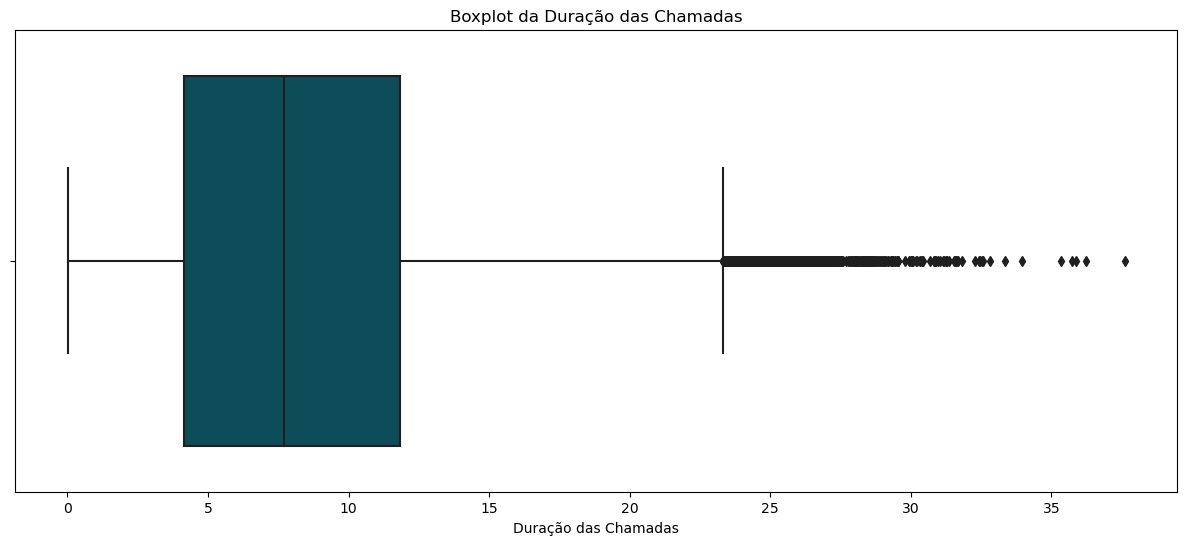

In [50]:
# boxplot do tempo de duração da chamadas
plt.figure(figsize=(15, 6))
sns.boxplot(x=df_calls['duration'], color='#005666')
plt.xlabel('Duração das Chamadas')
plt.title('Boxplot da Duração das Chamadas')
plt.show()

In [51]:
# vamos tratar os outliers com o método de Tukey
Q1 = df_calls['duration'].quantile(0.25)
Q3 = df_calls['duration'].quantile(0.75)
IQR = Q3 - Q1

In [52]:
# definindo limite superior
upper_limit = Q3 + 1.5 * IQR
upper_limit

23.325

In [53]:
# aplicando
df_calls= df_calls[(df_calls['duration'] <= upper_limit)]

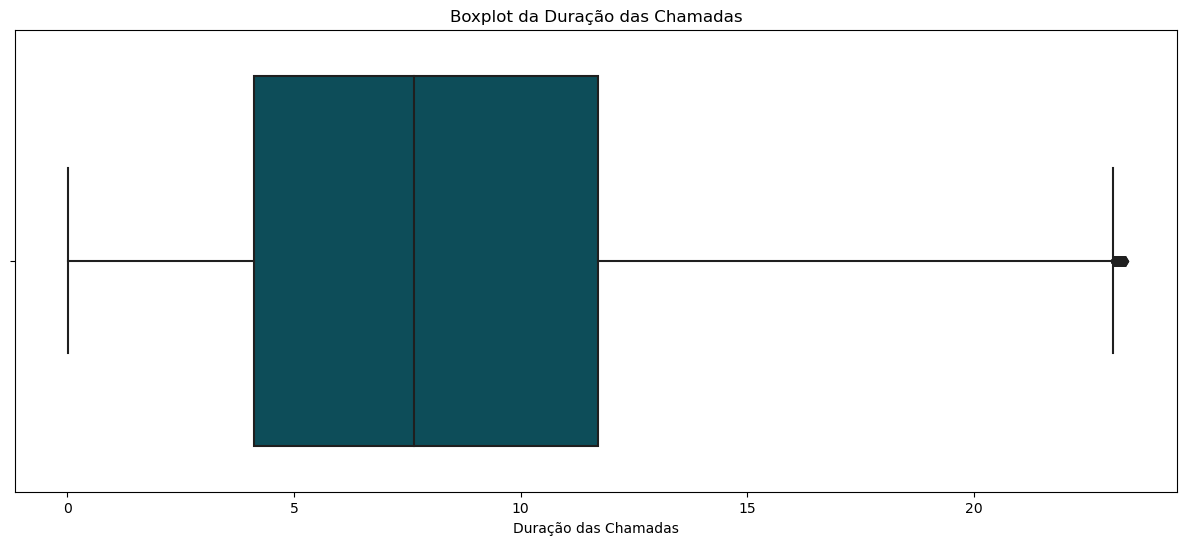

In [54]:
# verificando...
plt.figure(figsize=(15, 6))
sns.boxplot(x=df_calls['duration'], color='#005666')
plt.xlabel('Duração das Chamadas')
plt.title('Boxplot da Duração das Chamadas')
plt.show()

### Overview de df_calls.

- Bom volume de dados em df_calls
- sem dados nulos e duplicados
- média e mediana da duração das chamadas muito próximas
- transformamos a coluna call_date para formato data e hora
- contabilizamos as chamadas com 0 e optamos por retirá-las do dataset
- aproximadamente 20% do dataset tinha chamadas com 0
- outliers no tempo de chamadas começam a aparecer após o tempo de 20 minutos
- utilizamos o método de Tukey para tratar os outliers do df_calls

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante executou a etapa de pré-processamento para os dados de `chamadas` e apresentou suas conclusões. Entretanto, o que fará com os `outliers`? Detalhe como será feito o seu tratamento para esses casos.    
    
    
<br>
    
Sugestão: https://medium.com/@lucapqg/como-detectar-e-tratar-outliers-com-python-ca2cf088c160

</div>

<div class="alert alert-block alert-info">
<b>Comentário do Aluno.</b> <a class="tocSkip"></a>

Identifiquei os outliers e esqueci de tratar eles neste projeto. Mas fiz os ajustes conforme solicitou e gostei bastante do método de Tukey.

Ótimo link que me enviou e já estou seguindo o rapaz no medium.

</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2</b> <a class="tocSkip"></a>

Ótimo! Tratar outliers é sempre um desafio e precisa de muita experimentação e domínio de negócio. Você está no caminho certo.
</div>

## Mensagens

*Analisando df_messages*

In [55]:
# verificando nomes das colunas
df_messages.columns

Index(['id', 'user_id', 'message_date'], dtype='object')

In [56]:
# tamanho
df_messages.shape

(76051, 3)

In [57]:
# informações gerais
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [58]:
# cabeçalho
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [59]:
# rodapé
df_messages.tail()

,id,user_id,message_date
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23


In [60]:
# descrição
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [61]:
# verificando duplicados
df_messages.duplicated().sum()

0

In [62]:
# mais informações
df_messages.value_counts().sum()

76051

In [63]:
# isna
df_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

### Corrigindo dados

In [64]:
# message_date para date
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['message_date'].head()

0   2018-12-27
1   2018-12-31
2   2018-12-31
3   2018-12-27
4   2018-12-26
Name: message_date, dtype: datetime64[ns]

### Overview de df_messages.

- Sem valores nulos ou duplicados em df_messages
- transformamos a coluna 'message_date' em to_datetime

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante executou a etapa de pré-processamento para os dados de `mensagens` e apresentou suas conclusões. 

</div>

## Internet

*Explorando df_internet*

In [65]:
# verificando nomes das colunas
df_internet.columns

Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')

In [66]:
# tamanho
df_internet.shape

(104825, 4)

In [67]:
# informações gerais
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [68]:
# cabeçalho
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [69]:
# rodapé
df_internet.tail()

,id,user_id,session_date,mb_used
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31


In [70]:
# session_date para date
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['session_date']

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]

In [71]:
# descrição
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [72]:
# verificando duplicados
df_internet.duplicated().sum()

0

In [73]:
# mais informações
df_internet.value_counts().sum()

104825

In [74]:
# valores nulos
df_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [75]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [76]:
df_mb_zero = df_internet.loc[df_internet['mb_used'] == 0].count()
df_mb_zero

id              13747
user_id         13747
session_date    13747
mb_used         13747
dtype: int64

In [77]:
relation = df_mb_zero[0] / df_internet.shape[0]
print(f'A proporção de linhas com informações de 0 mb usados no df_internet é de: {(round(relation, 4) * 100)} %')

A proporção de linhas com informações de 0 mb usados no df_internet é de: 13.11 %


In [78]:
# removendo do df_internet onde mb_used é zero
df_internet = df_internet[df_internet['mb_used'] != 0]
# verificando...
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68


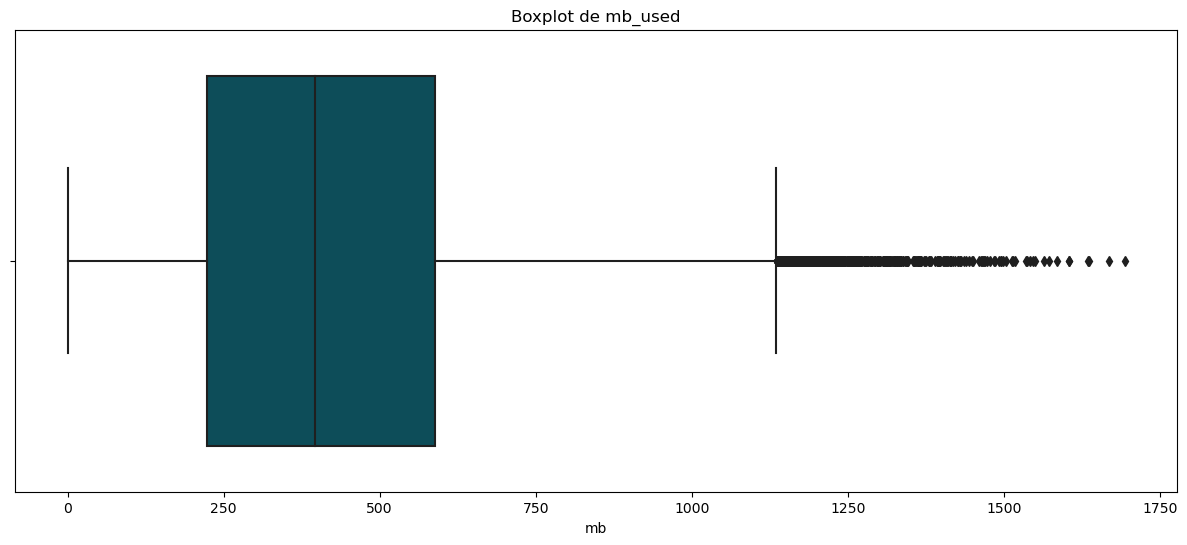

In [79]:
# boxplot de df_internet
plt.figure(figsize=(15, 6))
sns.boxplot(x=df_internet['mb_used'], color='#005666')
plt.xlabel('mb')
plt.title('Boxplot de mb_used')
plt.show()

In [80]:
# muitos outliers...
Q1 = df_internet['mb_used'].quantile(0.25)
Q3 = df_internet['mb_used'].quantile(0.75)
IQR = Q3 - Q1

In [81]:
# limite superior
upper_limit = Q3 + 1.5 * IQR

In [82]:
# limpando
df_internet = df_internet[(df_internet['mb_used'] <= upper_limit)]

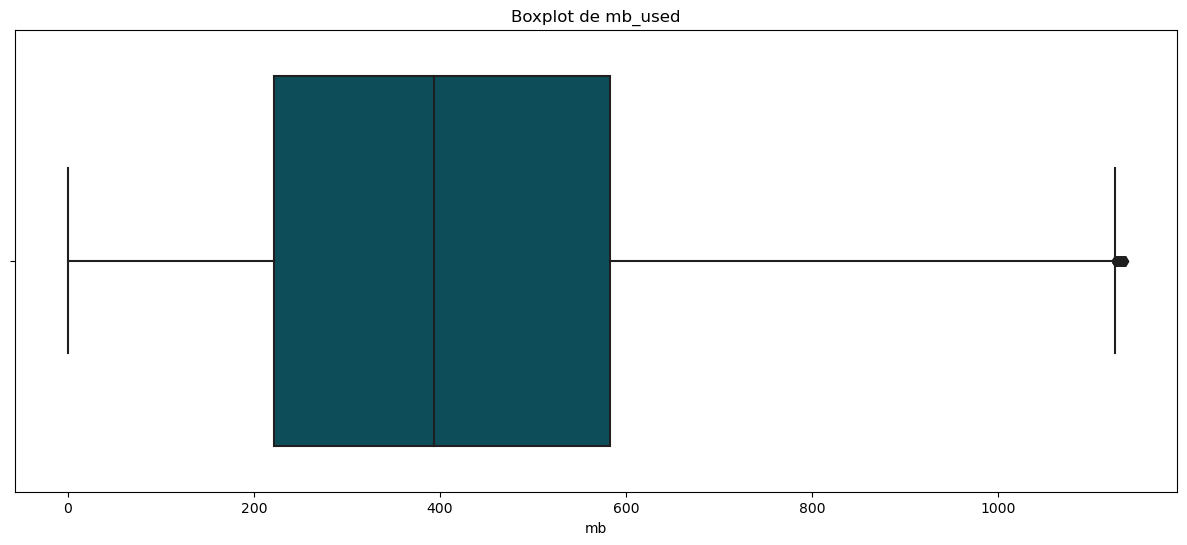

In [83]:
# verificando a remoção com boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(x=df_internet['mb_used'], color='#005666')
plt.xlabel('mb')
plt.title('Boxplot de mb_used')
plt.show()

### Overview df_internet.

- Novamente sem duplicados e sem valores nulos
- média e mediana de mb usados ficou em torno de 350 mb
- existiam 13747 acessos com 0 mb usados, o qual representa 13% do dataset
- foram removidos
- tratamos novamente os outliers com o valioso método Tukey

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante executou a etapa de pré-processamento para os dados de `internet` e apresentou suas conclusões. Novamente, detalhe sua estratégia para lidar com outliers e defenda sua escolha.

</div>

<div class="alert alert-block alert-info">
<b>Comentário do Aluno.</b> <a class="tocSkip"></a>

Executado o tratamento dos outliers novamente.

</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2</b> <a class="tocSkip"></a>

Perfeito!
</div>

## Estudando as variáveis dos planos.

In [84]:
# Estudando os planos
df_plans.head()

,plan_name,usd_monthly_pay,gb_per_month_included,usd_per_gb,minutes_included,usd_per_minute,messages_included,usd_per_message,mb_per_month_included
0,surf,20,15.0,10,500,0.03,50,0.03,15360
1,ultimate,70,30.0,7,3000,0.01,1000,0.01,30720


## Dados agregados por usuário

[Agora, como os dados estão limpos, agregue os dados por usuário por período para ter apenas um registro por usuário por período. Irá facilitar muito a análise posterior.]

### df_messages.

In [85]:
# verificando df_messages
df_messages.sample(5)

,id,user_id,message_date
11560,1078_27,1078,2018-12-25
56002,1354_202,1354,2018-10-25
49839,1328_797,1328,2018-09-11
10906,1077_177,1077,2018-06-22
1380,1011_343,1011,2018-06-25


In [86]:
# criando nova coluna month em df_messages
df_messages['month'] = df_messages['message_date'].dt.month

In [87]:
# removendo message_date
df_messages = df_messages.drop('message_date', axis=1)

In [88]:
# pivot table
df_messages = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')

In [89]:
# alterando índices
df_messages.reset_index(inplace=True)

In [90]:
# renomeando coluna
df_messages.rename(columns={'id': 'msg_sent'}, inplace=True)

In [91]:
# conferindo a quantidade de mensagens enviadas por usuário por mês
df_messages.head(10)

,user_id,month,msg_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante analisou os dados agregados para `mensagens` e utilizou corretamente a função `.dt.month` para acessar o mês a partir da data.

</div>

### df_internet.

In [92]:
# verificando df_internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68


In [93]:
# criando coluna month em df_internet
df_internet['month'] = df_internet['session_date'].dt.month

In [94]:
# pivoteando
df_internet = df_internet.pivot_table(index=['user_id', 'month'] ,values='mb_used', aggfunc='sum')

In [95]:
# alterando índices
df_internet.reset_index(inplace=True)

In [96]:
# conferindo volume de tráfego de internet usado por cada usuário por mês
df_internet.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,12140.09
3,1001,10,22330.49
4,1001,11,18504.30


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante analisou os dados agregados para `internet` e utilizou corretamente a função `.dt.month` para acessar o mês a partir da data.

</div>

### df_calls.

In [97]:
# criando nova coluna month
df_calls['month'] = df_calls['call_date'].dt.month

In [98]:
# verificando...
df_calls.sample(5)

,id,user_id,call_date,duration,month
100987,1361_89,1361,2018-09-20,12.20,9
15538,1061_480,1061,2018-09-09,9.59,9
37435,1141_428,1141,2018-10-14,8.47,10
106256,1374_352,1374,2018-11-14,8.56,11
42916,1156_521,1156,2018-06-07,3.41,6


In [99]:
# pivot table
df_calls = df_calls.pivot_table(index=['user_id', 'month'], values=['duration', 'id'], aggfunc={'duration': 'sum', 'id': 'count'})

In [100]:
# alterando índices
df_calls.reset_index(inplace=True)

In [101]:
# conferindo
df_calls.head()

,user_id,month,duration,id
0,1000,12,116.83,16
1,1001,8,171.14,22
2,1001,9,297.69,38
3,1001,10,374.11,47
4,1001,11,374.59,48


In [102]:
# renomeando colunas
df_calls.rename(columns={'id': 'number_of_calls', 'duration': 'calls_duration_minutes'}, inplace=True)

In [103]:
# agora temos a quantidade de chamadas feitas e a duração delas por cada usuário por mês
df_calls.head()

,user_id,month,calls_duration_minutes,number_of_calls
0,1000,12,116.83,16
1,1001,8,171.14,22
2,1001,9,297.69,38
3,1001,10,374.11,47
4,1001,11,374.59,48


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante analisou os dados agregados para `chamadas` e utilizou corretamente a função `.dt.month` para acessar o mês a partir da data.

</div>

## Agregando os datasets.

In [104]:
# usando merge
merged_df = pd.merge(df_internet, df_messages, on=['user_id', 'month'], how='outer')

In [105]:
# novamente merge...
merged_df = pd.merge(merged_df, df_calls, on=['user_id', 'month'], how='outer')

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Aqui você está fazendo o join entre os conjuntos de dados usando o `inner`, porém essa estratégia irá fazer um filtro na tabela resultante para manter somente os usuários que existem nos dois casos e também fizeram uma ação no mesmo mês. Por exemplo, você irá manter somente usuários que usaram internet, fizeram chamada e enviaram mensagem. O que acontece se um usuário enviou mensagem mas não teve nenhuma ligação naquele mês?
    
Para fazer esse merge, use o `outer` para preservar os dados de todos os conjuntos de dados. Essa figura mostra o que é executado em cada tipo de operação: https://miro.medium.com/v2/resize:fit:1400/format:webp/1*9eH1_7VbTZPZd9jBiGIyNA.png. Repare que essa etapa pode mudar completamente o resto da sua análise.

</div>

In [106]:
# conferindo os merges
merged_df.isna().sum()

user_id                     0
month                       0
mb_used                    17
msg_sent                  487
calls_duration_minutes     37
number_of_calls            37
dtype: int64

In [107]:
# Nan onde os usuários não utilizaram os serviços
merged_df.fillna(0, inplace=True)

<div class="alert alert-block alert-info">
<b>Comentário do Aluno.</b> <a class="tocSkip"></a>

Acredito ter entendido e efetuado corretamente agora o merge e o tratamento pós merge.

Obrigado pela observação e vou ficar mais atento nos projetos seguintes!

</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2</b> <a class="tocSkip"></a>

Correto! Isso mesmo, essa etapa de merge de dados é muito importante, pois pode impactar todas as análises subsequentes. Fique atento também a qual o método padrão utilizado pela biblioteca se nenhum valor é informado. Por precaução, tente sempre informar explicitamente o método (`inner`, `outer`, `left`, etc.) que pretende utilizar.
</div>

In [108]:
# renomeando e verificando
df = merged_df.copy()
df.head(12)

,user_id,month,mb_used,msg_sent,calls_duration_minutes,number_of_calls
0,1000,12,1901.47,11.0,116.83,16.0
1,1001,8,6919.15,30.0,171.14,22.0
2,1001,9,12140.09,44.0,297.69,38.0
3,1001,10,22330.49,53.0,374.11,47.0
4,1001,11,18504.30,36.0,374.59,48.0
5,1001,12,18226.93,44.0,339.20,44.0
6,1002,10,6552.01,15.0,54.13,8.0
7,1002,11,19345.08,32.0,359.76,48.0
8,1002,12,14396.24,41.0,337.02,37.0
9,1003,12,24600.83,50.0,990.06,116.0


In [109]:
# inserindo planos no df
df = df.merge(df_users[['user_id', 'plan']], on='user_id', how='left')

In [110]:
# conferindo e renomeando
df.rename(columns={'new_column': 'plan'}, inplace=True)

In [111]:
# renomeando coluna para o merge posterior
df_plans.rename(columns={'plan_name': 'plan'}, inplace=True)

In [112]:
# adicionando informações dos planos
df = df.merge(df_plans, on='plan', how='left')

In [113]:
# transformando...
df['gb_used'] = df['mb_used'] / 1024

In [114]:
# reordenando
new_order = ['user_id', 'plan', 'month', 'usd_monthly_pay', 'number_of_calls', 'calls_duration_minutes', 'minutes_included', 'usd_per_minute', 'msg_sent', 'messages_included', 'usd_per_message', 'gb_used', 'gb_per_month_included', 'usd_per_gb']
df = df[new_order]

### Calculando receita mensal por usuário.

In [115]:
# criando algumas funções (por chamadas)
def minutes_exceeded(row):

    total_minutes = row['calls_duration_minutes']
    tax_minutes = row['usd_per_minute']
    plan = row['plan']

    if plan == 'surf' and total_minutes > 500:
        usd_exceeded_in_calls = (total_minutes - 500) * tax_minutes
    elif plan == 'ultimate' and total_minutes > 3000:
        usd_exceeded_in_calls = (total_minutes - 3000) * tax_minutes
    else:
        usd_exceeded_in_calls = 0

    return round(usd_exceeded_in_calls, 2)

In [116]:
# aplicando
df['usd_exceeded_in_calls'] = df.apply(minutes_exceeded, axis=1)

In [117]:
# filtrando
data_surf = df[df['plan'] == 'surf']['usd_exceeded_in_calls']
data_ultimate = df[df['plan'] == 'ultimate']['usd_exceeded_in_calls']

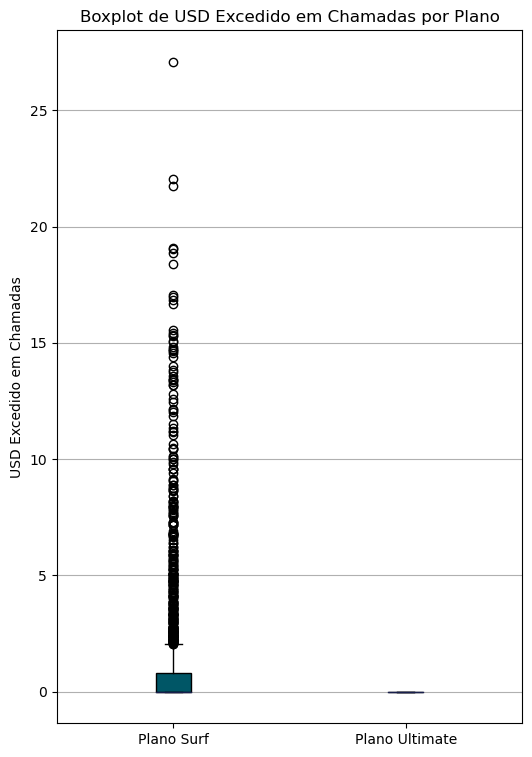

In [118]:
# boxplot
plt.figure(figsize=(6, 9))
plt.boxplot([data_surf, data_ultimate], labels=['Plano Surf', 'Plano Ultimate'], patch_artist=True )
plt.title('Boxplot de USD Excedido em Chamadas por Plano')
plt.ylabel('USD Excedido em Chamadas')
plt.grid(True, axis='y')

In [119]:
# função para messages
def msg_exceeded(row):

    total_msg = row['msg_sent']
    tax_msg = row['usd_per_message']
    plan = row['plan']

    if plan == 'surf' and total_msg > 50:
        usd_exceeded_in_msg = (total_msg - 50) * tax_msg
    elif plan == 'ultimate' and total_msg > 1000:
        usd_exceeded_in_msg = (total_msg - 1000) * tax_msg
    else:
        usd_exceeded_in_msg = 0

    return usd_exceeded_in_msg

In [120]:
# aplicando
df['usd_exceeded_in_msg'] = df.apply(msg_exceeded, axis=1)

In [121]:
# Filtrando
data_surf_msg = df[df['plan'] == 'surf']['usd_exceeded_in_msg']
data_ultimate_msg = df[df['plan'] == 'ultimate']['usd_exceeded_in_msg']

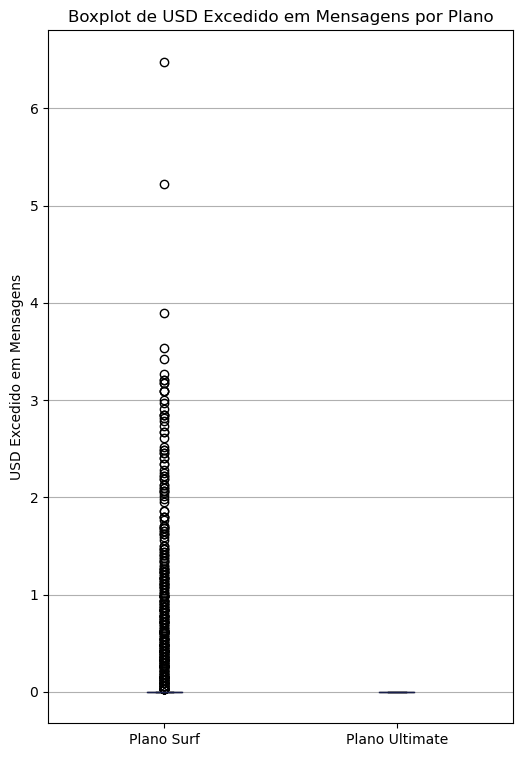

In [122]:
# boxplot
plt.figure(figsize=(6, 9))
plt.boxplot([data_surf_msg, data_ultimate_msg], labels=['Plano Surf', 'Plano Ultimate'], patch_artist=True)
plt.title('Boxplot de USD Excedido em Mensagens por Plano')
plt.ylabel('USD Excedido em Mensagens')
plt.grid(True, axis='y')
plt.show()

In [123]:
# função para internet
def gb_exceeded(row):

    total_gb = row['gb_used']
    tax_gb = row['usd_per_gb']
    plan = row['plan']

    if plan == 'surf' and total_gb > 7:
        usd_exceeded_in_gb = (total_gb - 7) * tax_gb
    elif plan == 'ultimate' and total_gb > 10:
        usd_exceeded_in_gb = (total_gb - 10) * tax_gb
    else:
        usd_exceeded_in_gb = 0

    return usd_exceeded_in_gb

In [124]:
# aplicando
df['usd_exceeded_in_gb'] = df.apply(gb_exceeded, axis=1)

In [125]:
# receita mensal por usuário
df['monthly_income'] = round(df['usd_monthly_pay'] + df['usd_exceeded_in_calls'] + df['usd_exceeded_in_msg'] + df['usd_exceeded_in_gb'], 2)

In [126]:
# reodenando colunas...
new_order = ['user_id', 'plan', 'monthly_income','month', 'usd_monthly_pay', 'number_of_calls', 'calls_duration_minutes', 'minutes_included', 'usd_per_minute', 'msg_sent', 'messages_included', 'usd_per_message', 'gb_used', 'gb_per_month_included', 'usd_per_gb']
df = df[new_order]

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante executou o cálculo de receita mensal por usuário para mensagens, chamadas e internet. Chama atenção que a distribuição para o plano "Ultimate" está bem distorcida em todos os casos. Isso pode ser um efeito do filtro feito pelo join anteriormente. Após correção daquele trecho, vamos revisitar essa análise. 

</div>

## Estudar o comportamento do usuário

### Chamadas

In [127]:
# separando por planos
plan_surf = df[ df['plan'] == 'surf']
plan_ultimate = df[ df['plan'] == 'ultimate']

In [128]:
# agrupando...
grouped_surf = plan_surf.groupby(['plan', 'month'])['calls_duration_minutes'].mean()
round(grouped_surf, 0)
grouped_ultimate = plan_ultimate.groupby(['plan', 'month'])['calls_duration_minutes'].mean()
round(grouped_ultimate, 0)

plan      month
ultimate  1        171.0
          2        365.0
          3        279.0
          4        309.0
          5        375.0
          6        341.0
          7        394.0
          8        388.0
          9        403.0
          10       411.0
          11       411.0
          12       423.0
Name: calls_duration_minutes, dtype: float64

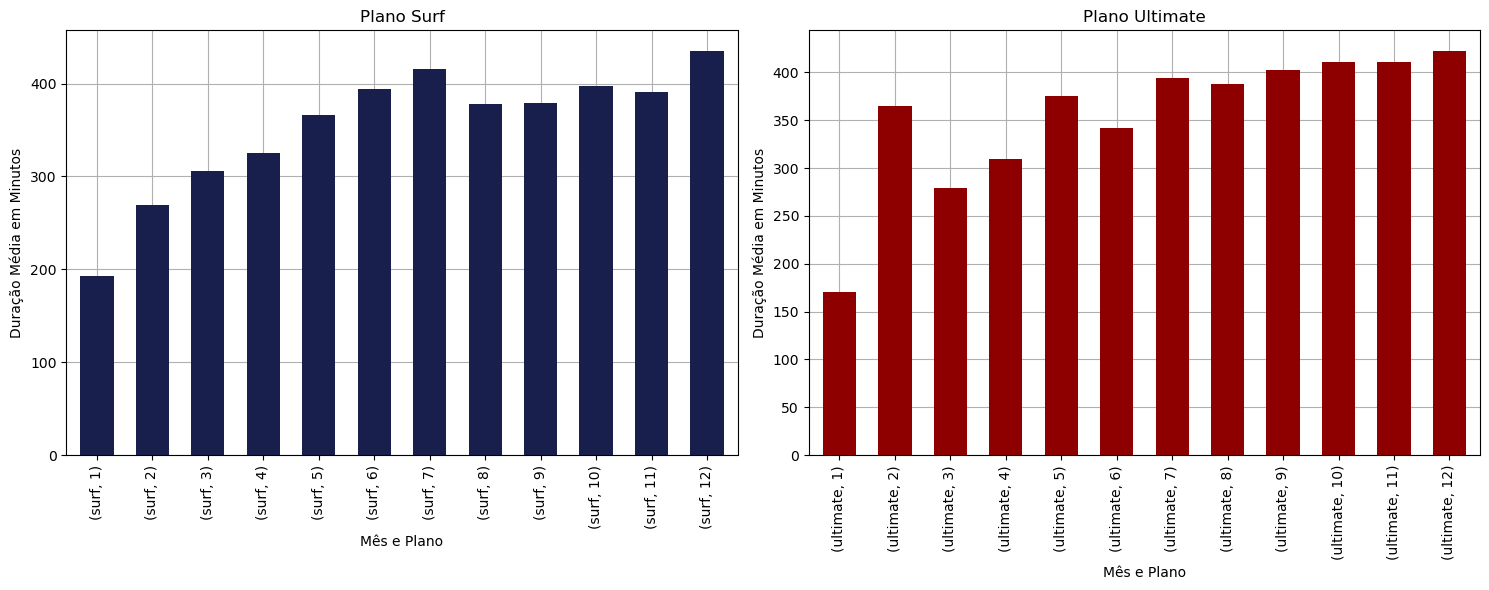

In [129]:
# plotando barras da duração média das ligações de cada plano para cada mês
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

grouped_surf.plot(kind='bar', color='#181f4c', width = 0.6)
plt.title('Plano Surf')
plt.xlabel('Mês e Plano')
plt.ylabel('Duração Média em Minutos')
plt.grid(True, zorder = 0)
plt.gca().set_axisbelow(True)

plt.subplot(1, 2, 2)
grouped_ultimate.plot(kind='bar', color='#8e0000', width = 0.6)
plt.title('Plano Ultimate')
plt.xlabel('Mês e Plano')
plt.ylabel('Duração Média em Minutos')
plt.grid(True, zorder = 0)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

In [130]:
# separando
minutes_surf = plan_surf['calls_duration_minutes']
minutes_ultimate = plan_ultimate['calls_duration_minutes']

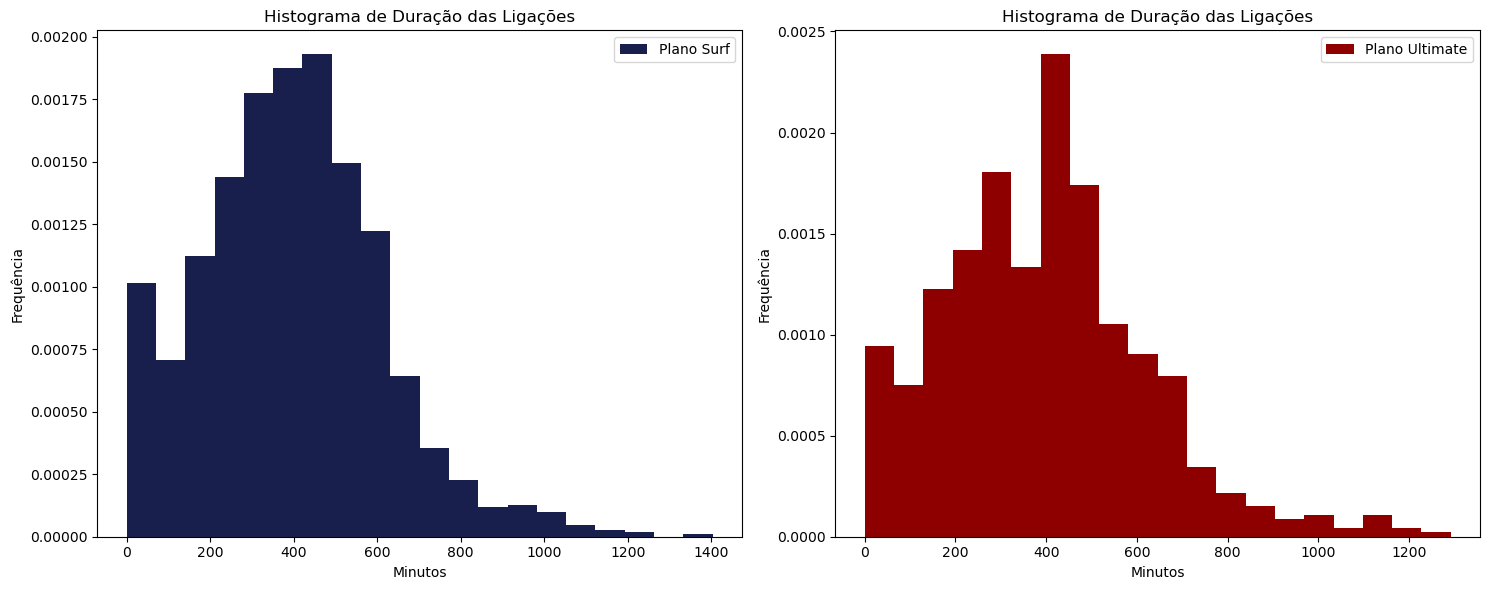

In [131]:
# distribuição dos minutos dos usuários por plano
color_surf = '#181f4c'
color_ultimate = '#8e0000'
alpha = 1

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].hist(minutes_surf, bins=20, color=color_surf, alpha=alpha, label='Plano Surf', density=True)
axs[0].set_title('Histograma de Duração das Ligações')
axs[0].set_xlabel('Minutos')
axs[0].set_ylabel('Frequência')
axs[0].legend()

axs[1].hist(minutes_ultimate, bins=20, color=color_ultimate, alpha=alpha, label='Plano Ultimate', density=True)
axs[1].set_title('Histograma de Duração das Ligações')
axs[1].set_xlabel('Minutos')
axs[1].set_ylabel('Frequência')
axs[1].legend()

plt.tight_layout()
plt.show()

In [132]:
# Calculando a média e a variâcia da duração mensal das chamadas
df.groupby('month').agg(media_chamadas=('calls_duration_minutes','mean'),
                        variancia_chamadas = ('calls_duration_minutes','var'),
                        desvio_padrao_chamadas=('calls_duration_minutes', 'std')
                        ).round(2)

,media_chamadas,variancia_chamadas,desvio_padrao_chamadas
month,,,
1,177.96,11453.71,107.02
2,310.95,47565.52,218.10
3,296.38,38099.01,195.19
4,320.73,38408.95,195.98
5,368.71,46834.16,216.41
6,376.96,38112.39,195.22
7,408.31,55101.33,234.74
8,380.73,46615.18,215.91
9,386.54,42431.05,205.99


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Calcule do desvio padrão também para esse atributo.

</div>

<div class="alert alert-block alert-info">
<b>Comentário do Aluno.</b> <a class="tocSkip"></a>

Desvio padrão inserido com sucesso.

</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2</b> <a class="tocSkip"></a>

Perfeito!
</div>

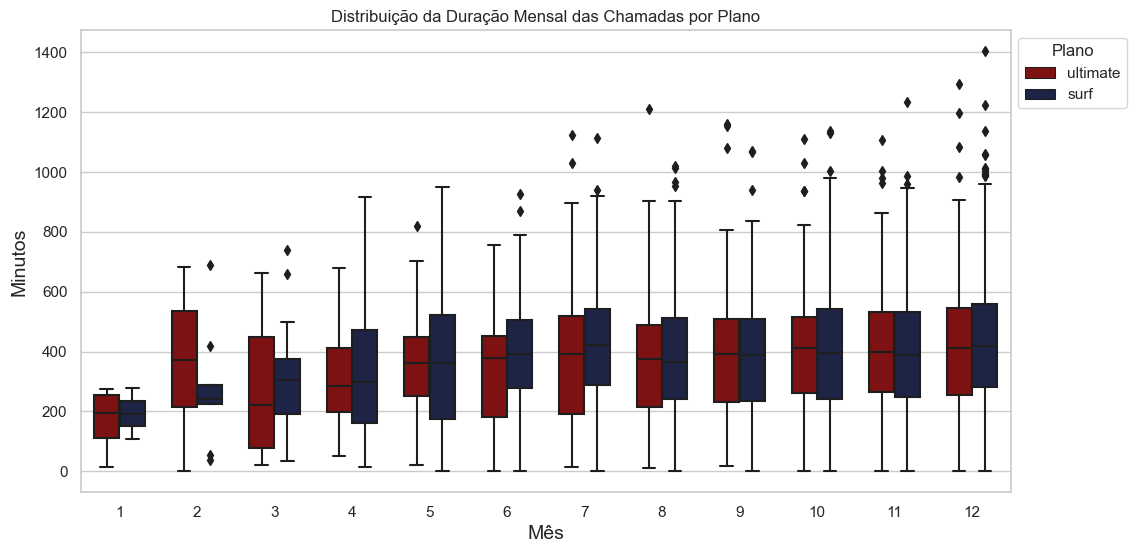

In [133]:
# boxplot da duração mensal das chamadas por plano
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", rc={"axes.labelsize": 14})

sns.boxplot(data=df, x='month', y='calls_duration_minutes', hue='plan', dodge=True, palette={color_surf, color_ultimate}, width=.66)
plt.xlabel('Mês')
plt.ylabel('Minutos')
plt.title('Distribuição da Duração Mensal das Chamadas por Plano')

plt.legend(title='Plano', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Overview de Calls.

- no mês de janeiro os usuários do plano ultimate fazem pouquíssimas ligações
- os primeiros 2 trimestres mostram mais diferenças entre os usuários 
- fevereiro é o mês com maior variância entre o tempo de duração das chamadas
- no segundo semestre o comportamento dos usuários tende a se manter mais uniforme, mas com maior aparição de outliers
- esses outliers seriam devido a estar se aproximando o final de ano e suas festividades?

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante executou corretamente as etapas para os dados de chamadas:
- Exibiu corretamente gráficos de uso mensal por plano
- Apresentou o histograma da duração das chamadas
- Calculou a média e a variância
- Criou boxplots da duração mensal por plano
- Apresentou conclusões da sua análise. 
    
Sobre esse comentário: "esses outliers seriam devido a estar se aproximando o final de ano e suas festividades?" é uma hipótese válida.

</div>

### Mensagens

In [134]:
# Comparando o número de mensagens que os usuários de cada plano tendem a enviar a cada mês
grouped_surf = plan_surf.groupby(['plan', 'month'])['msg_sent'].mean()
grouped_ultimate = plan_ultimate.groupby(['plan', 'month'])['msg_sent'].mean()

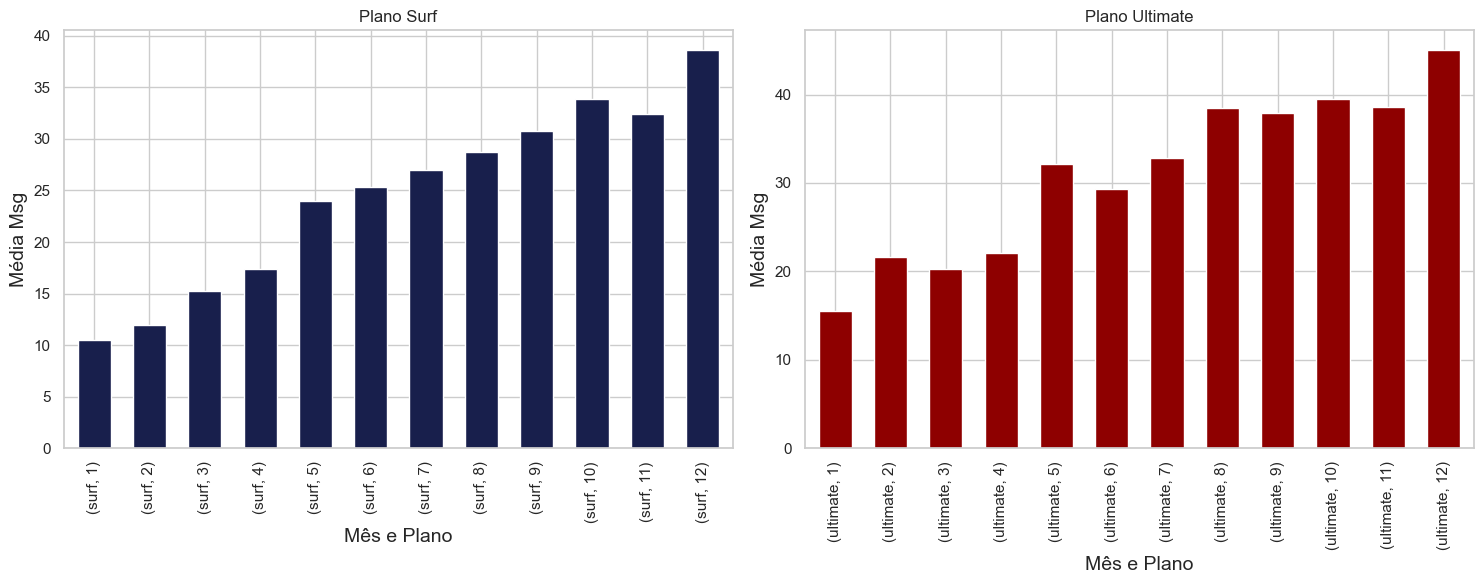

In [135]:
# plotando barras com a quantidade média de msg para cada plano em cada mês
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

grouped_surf.plot(kind='bar', color='#181f4c', width = 0.6)
plt.title('Plano Surf')
plt.xlabel('Mês e Plano')
plt.ylabel('Média Msg')
plt.grid(True, zorder = 0)
plt.gca().set_axisbelow(True)

plt.subplot(1, 2, 2)
grouped_ultimate.plot(kind='bar', color='#8e0000', width = 0.6)
plt.title('Plano Ultimate')
plt.xlabel('Mês e Plano')
plt.ylabel('Média Msg')
plt.grid(True, zorder = 0)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

### Overview de messages.

- tendência de crescimento do envio de mensagens ao decorrer do ano em ambos os planos
- ligeiramente os usuários do plano surf enviam menos mensagens em média
- pico de mensagens enviadas novamente no final do ano

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante executou corretamente as etapas para os dados de mensagens:
- Exibiu corretamente gráficos de uso mensal por plano
- Apresentou conclusões da sua análise. 

</div>

### Internet

In [136]:
# Comparando a quantidade de tráfego de internet consumido pelos usuários por plano
grouped_surf = plan_surf.groupby(['plan', 'month'])['gb_used'].mean()
grouped_ultimate = plan_ultimate.groupby(['plan', 'month'])['gb_used'].mean()

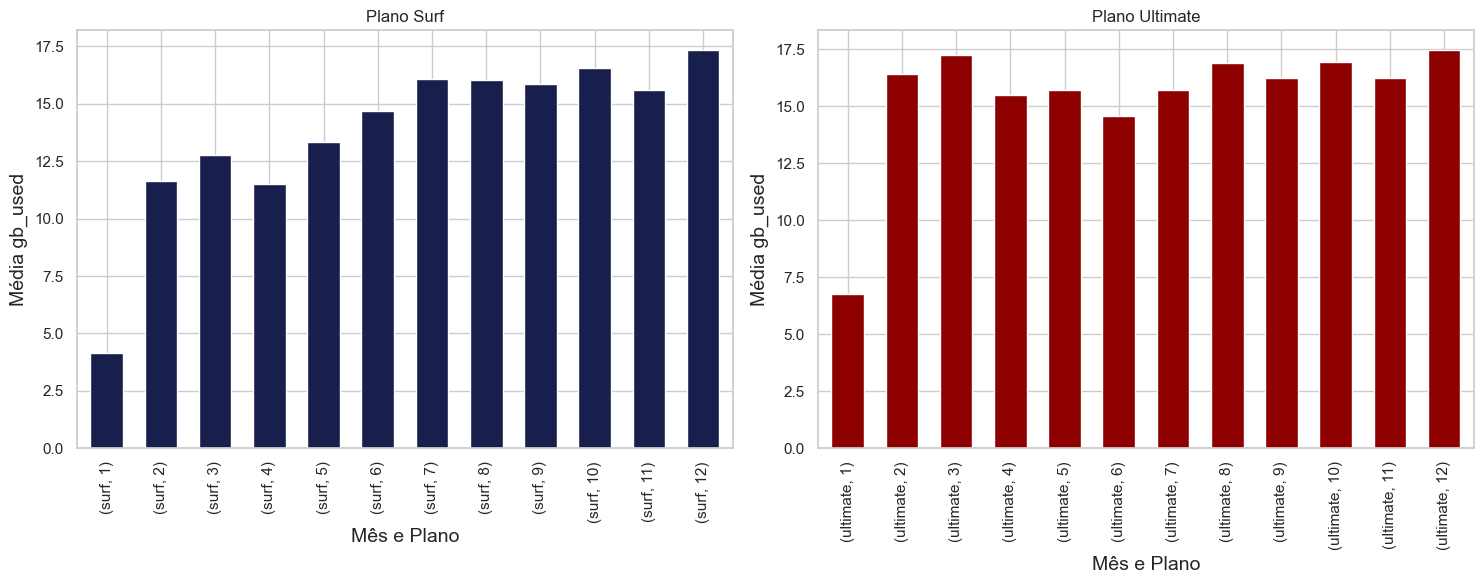

In [137]:
# plotando barras com a quantidade média de gb_used para cada plano em cada mês
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

grouped_surf.plot(kind='bar', color='#181f4c', width = 0.6)
plt.title('Plano Surf')
plt.xlabel('Mês e Plano')
plt.ylabel('Média gb_used')
plt.grid(True, zorder = 0)
plt.gca().set_axisbelow(True)

plt.subplot(1, 2, 2)
grouped_ultimate.plot(kind='bar', color='#8e0000', width = 0.6)
plt.title('Plano Ultimate')
plt.xlabel('Mês e Plano')
plt.ylabel('Média gb_used')
plt.grid(True, zorder = 0)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

In [138]:
# Calculando a média e a variâcia do gb_used
df.groupby('month').agg(media_gb=('gb_used','mean'),
                        variancia_gb = ('gb_used','var'),
                        desvio_padrao_gb = ('gb_used', 'std')
                        ).round(2)

,media_gb,variancia_gb,desvio_padrao_gb
month,,,
1,5.89,13.38,3.66
2,13.72,42.65,6.53
3,14.29,83.56,9.14
4,12.70,63.70,7.98
5,13.99,52.38,7.24
6,14.66,49.98,7.07
7,15.95,59.80,7.73
8,16.31,60.91,7.80
9,15.99,45.37,6.74


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Calcule do desvio padrão também para esse atributo.

</div>

<div class="alert alert-block alert-info">
<b>Comentário do Aluno.</b> <a class="tocSkip"></a>

Desvio padrão incluído conforme solicitado!

</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2</b> <a class="tocSkip"></a>

Perfeito!
</div>

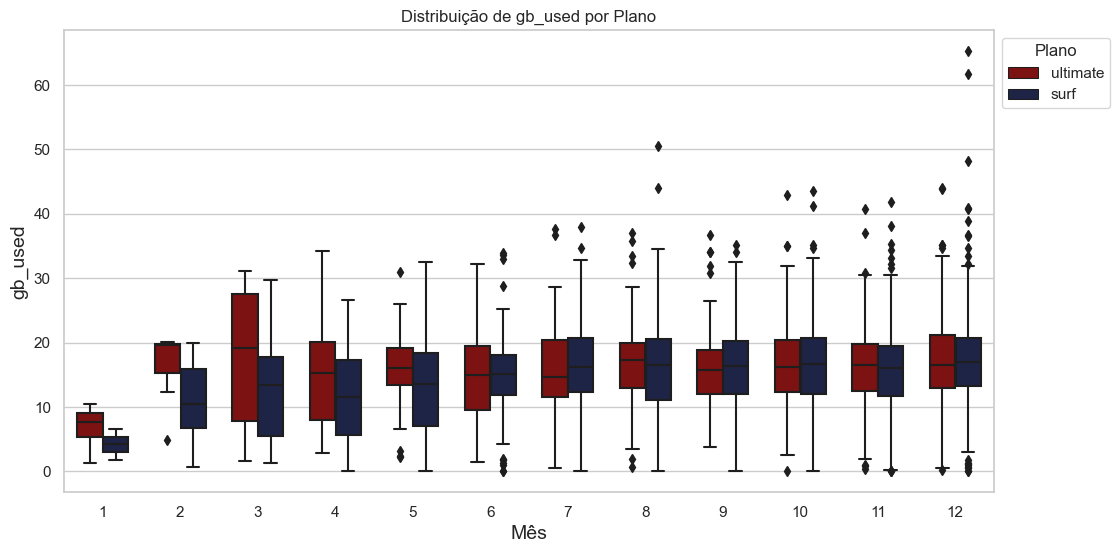

In [139]:
# boxplot para visualizar a distribuição média de dados utilizados por plano e por mês
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", rc={"axes.labelsize": 14})

sns.boxplot(data=df, x='month', y='gb_used', hue='plan', dodge=True, palette={color_surf, color_ultimate}, width=.66)
plt.xlabel('Mês')
plt.ylabel('gb_used')
plt.title('Distribuição de gb_used por Plano')

plt.legend(title='Plano', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Overview de Internet.

- primeiro semestre os usuários tendem a ter comportamentos diferentes quanto ao uso de internet
- usuários do plano ultimate usam mais gb conforme histograma
- ultimaters dificilmente consomem menos de 10 gb mensais
- os ultimaters tem pico de consumo de dados no primeiro trimestre, onde a média de consumo é bem maior que o restante do ano
- no segundo semestre, outliers vêm com força e alguns usuários chegaram a usar mais de 40 gb de dados
- maior variância e desvio padrão estão no mês de Março

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante executou corretamente as etapas para os dados de uso de internet:
- Exibiu corretamente gráficos de uso mensal por plano
- Calculou a média e a variância
- Criou boxplots com o uso de internet em GB por plano
- Apresentou conclusões da sua análise. 


</div>

## Receita

In [140]:
# agrupando...
grouped_surf = plan_surf.groupby(['plan', 'month'])['monthly_income'].mean()
grouped_ultimate = plan_ultimate.groupby(['plan', 'month'])['monthly_income'].mean()

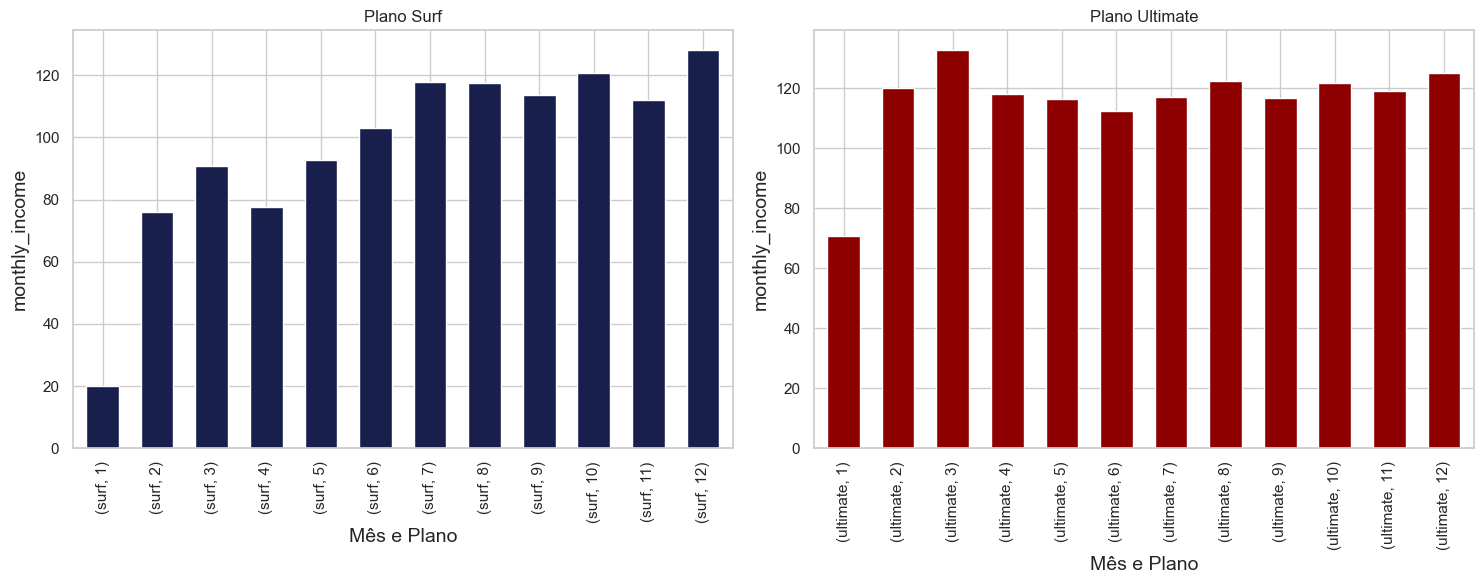

In [141]:
# barras de monthly_income
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

grouped_surf.plot(kind='bar', color='#181f4c', width = 0.6)
plt.title('Plano Surf')
plt.xlabel('Mês e Plano')
plt.ylabel('monthly_income')
plt.grid(True, zorder = 0)
plt.gca().set_axisbelow(True)

plt.subplot(1, 2, 2)
grouped_ultimate.plot(kind='bar', color='#8e0000', width = 0.6)
plt.title('Plano Ultimate')
plt.xlabel('Mês e Plano')
plt.ylabel('monthly_income')
plt.grid(True, zorder = 0)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

In [142]:
# separando
income_surf = plan_surf['monthly_income']
income_ultimate = plan_ultimate['monthly_income']

In [143]:
# max value
income_surf.max()

619.57

In [144]:
# max value
income_ultimate.max()

307.76

In [145]:
# top 10
top_10_spenders = df.sort_values(by='monthly_income', ascending=False).head(10)
top_10_spenders

,user_id,plan,monthly_income,month,usd_monthly_pay,number_of_calls,calls_duration_minutes,minutes_included,usd_per_minute,msg_sent,messages_included,usd_per_message,gb_used,gb_per_month_included,usd_per_gb
1751,1379,surf,619.57,12,20,112.0,994.70,500,0.03,126.0,50,0.03,65.245469,15.0,10
568,1121,surf,568.02,12,20,0.0,0.00,500,0.03,97.0,50,0.03,61.661113,15.0,10
1354,1292,surf,455.95,8,20,34.0,281.32,500,0.03,0.0,50,0.03,50.595068,15.0,10
1358,1292,surf,432.07,12,20,21.0,132.65,500,0.03,0.0,50,0.03,48.206748,15.0,10
1125,1240,surf,404.83,8,20,117.0,1014.18,500,0.03,15.0,50,0.03,43.940459,15.0,10
1356,1292,surf,385.26,10,20,30.0,290.79,500,0.03,0.0,50,0.03,43.525557,15.0,10
1127,1240,surf,380.28,10,20,125.0,1129.04,500,0.03,9.0,50,0.03,41.141445,15.0,10
1129,1240,surf,374.17,12,20,126.0,1055.41,500,0.03,18.0,50,0.03,40.751143,15.0,10
931,1194,surf,368.97,11,20,0.0,0.00,500,0.03,62.0,50,0.03,41.861426,15.0,10
1958,1418,surf,359.42,12,20,33.0,279.32,500,0.03,0.0,50,0.03,40.942080,15.0,10


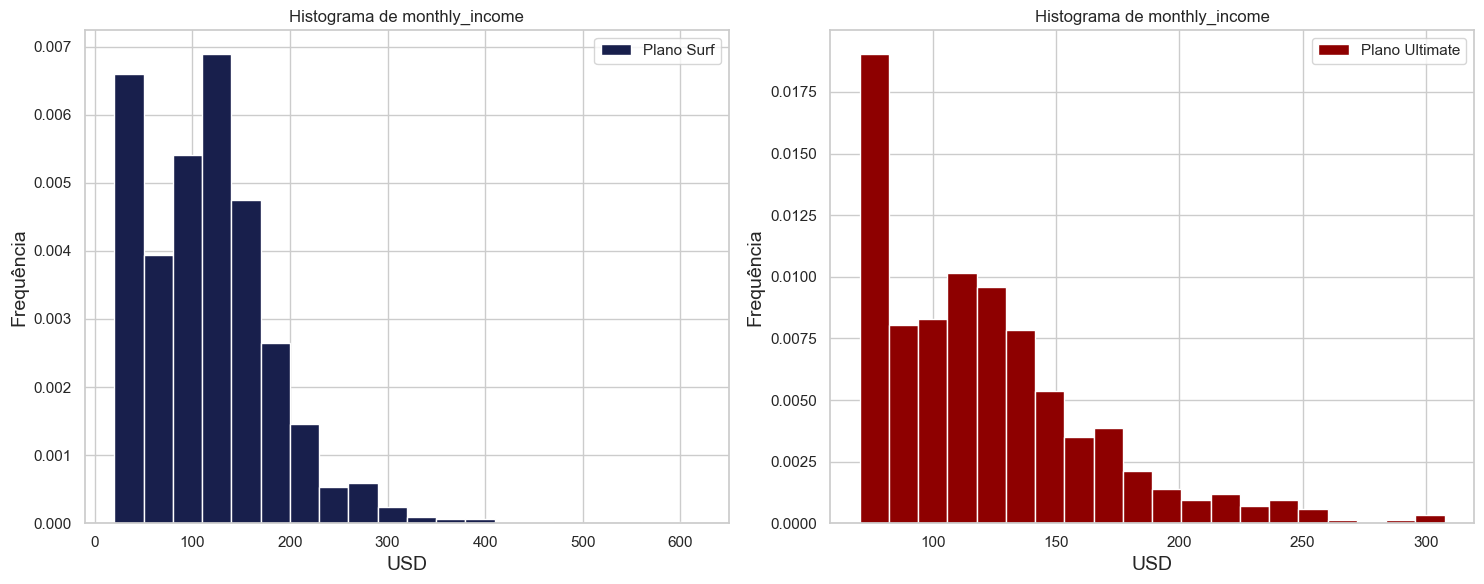

In [146]:
# distribuição de monthly_income
color_surf = '#181f4c'
color_ultimate = '#8e0000'
alpha = 1

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].hist(income_surf, bins=20, color=color_surf, alpha=alpha, label='Plano Surf', density=True)
axs[0].set_title('Histograma de monthly_income')
axs[0].set_xlabel('USD')
axs[0].set_ylabel('Frequência')
axs[0].legend()

axs[1].hist(income_ultimate, bins=20, color=color_ultimate, alpha=alpha, label='Plano Ultimate', density=True)
axs[1].set_title('Histograma de monthly_income')
axs[1].set_xlabel('USD')
axs[1].set_ylabel('Frequência')
axs[1].legend()

plt.tight_layout()
plt.show()

### Overview de montly_income.

- usuários do plano de surf tendem a ultrapassar os limites do seu plano com mais frequência
- um usuário do plano surf chegou a pagar mais de $600
- ultimaters frequentemente se mantém dentro dos limites dos pacotes contratados

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os resultados dessa análise podem ser afetados pelo `inner` join feito em uma etapa anterior. Vamos revisitar após o ajuste.

</div>

## Testando Hipóteses.

### Hipótese de que as receitas médias dos usuários dos planos Ultimate e Surf são diferentes.

Definindo:
- H0 (Hipótese Nula): A receita média dos usuários dos planos "Ultimate" e "Surf" são iguais.
- H1 (Hipótese Alternativa): A receita média dos usuários dos planos "Ultimate" e "Surf" são diferentes.

In [147]:
# com alpha de 5%
alpha = 0.05
sample_1 = df.query('plan == "surf"')['monthly_income']
sample_2 = df.query('plan == "ultimate"')['monthly_income']

t_statistic, p_value = st.ttest_ind(sample_1, sample_2)

print(f'P-Value: {p_value}')

if p_value < alpha:
    print("Rejeitamos a hipótese nula (H0): A receita média dos usuários dos planos Ultimate e Surf são diferentes.")
else:
    print("Não rejeitamos a hipótese nula (H0): Não há evidência suficiente para concluir que a receita média dos usuários dos planos Ultimate e Surf são diferentes.")

P-Value: 0.05402816572771812
Não rejeitamos a hipótese nula (H0): Não há evidência suficiente para concluir que a receita média dos usuários dos planos Ultimate e Surf são diferentes.


<div class="alert alert-block alert-success">
<b> Comentário do revisor v2</b> <a class="tocSkip"></a>

Você corrigiu corretamente o teste e repare que o valor deu muito próximo do seu limiar de confiança, então se fosse um pouco maior (0.1, por exemplo), o seu teste daria válido. Esse tipo de problema quando o valor p resulta em algo muito próximo do limiar é bem comum em experimentos. Lembre-se de se atentar também às premissas do teste estatístico que você está utilizando.
</div>

### Vamos aplicar o método Bootstrapping.

In [148]:
# médias observadas
observed_diff = np.mean(sample_1) - np.mean(sample_2)

In [149]:
# ciclo for com mil amostras e reposição
bootstrap_diffs = []
num_bootstraps = 1000

for i in range(num_bootstraps):
    bootstrap_sample_1 = np.random.choice(sample_1, len(sample_1), replace=True)
    bootstrap_sample_2 = np.random.choice(sample_2, len(sample_2), replace=True)
    
    bootstrap_diff = np.mean(bootstrap_sample_1) - np.mean(bootstrap_sample_2)
    bootstrap_diffs.append(bootstrap_diff)

In [150]:
# intervalo de confiança de 95%
confidence_interval = np.percentile(bootstrap_diffs, [2.5, 97.5])

if confidence_interval[0] <= observed_diff <= confidence_interval[1]:
    print("Não rejeitamos a hipótese nula (H0): Não há evidência suficiente para concluir que a receita média dos usuários dos planos Ultimate e Surf são diferentes.")
else:
    print("Rejeitamos a hipótese nula (H0): A receita média dos usuários dos planos Ultimate e Surf são diferentes.")

Não rejeitamos a hipótese nula (H0): Não há evidência suficiente para concluir que a receita média dos usuários dos planos Ultimate e Surf são diferentes.


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui tem um pequeno ajuste de interpretação: a hipótese nula é rejeitada quando o valor de p (p-value) é menor do que `alpha` e não o contrário. Em outras palavras, você só consegue afirmar que a receita não é igual (sua hipótese alternativa) se o p-value for menor do que 0.05. Além disso, esse resultado pode ser afetado pelo join mencionado anteriormente, vamos revisitar esse teste após o ajuste.

<br>
    
Aqui está uma referência para te ajudar com testes de hipótese: https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e. 
    
    
<br> 
    
Por fim, sempre verifique quais são as premissas do teste que você está executando e se ele realmente se aplica ao seu problema. Uma abordagem interessante também para testar se há diferença entre grupos é calcular intervalos de confiança via boostrapping: https://www.statology.org/bootstrapping-in-python/. 
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2</b> <a class="tocSkip"></a>

O bootstrapping é uma técnica muito útil para gerar distribuições que seguem a distribuição normal (usando como conceito o teorema central do limite) e calcular intervalos de confiança.
    
Você poderia também gerar a sua amostra de bootstrapping dessa forma, sem precisar do loop:
    
```python
    bs = st.bootstrap(
    (data.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)
```    

E acessar o intervalo de confiança assim:
    
```python
bs.confidence_interval
```
</div>

### Testando a hipótese de que a receita média dos usuários da área de NY-NJ é diferente dos usuários das demais regiões.

Definindo:
- Hipótese Nula (H0): A receita média dos usuários da área de NY-NJ é igual à receita média dos usuários das demais regiões.
- Hipótese Alternativa (H1): A receita média dos usuários da área de NY-NJ é diferente da receita média dos usuários das demais regiões.

In [151]:
# trazendo informações da cidade dos usuários
df_city = df_users[['user_id', 'city', 'exited']]

In [152]:
# merge no df
df = df.merge(df_city, on='user_id')

In [153]:
# Testando hipótese
alpha = 0.05
samp_1 = df[df['city'].str.contains('NY-NJ')]['monthly_income']
samp_2 = df.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_income']

results = st.ttest_ind(samp_1, samp_2, equal_var=False)
p_value = results.pvalue
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Rejeitar a hipótese nula.")
    print("Há evidências estatísticas de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.")
else:
    print("Não rejeitar a hipótese nula.")
    print("Não há evidências estatísticas suficientes para concluir que a receita média difere entre os grupos.")

P-Value: 0.684024445572532
Não rejeitar a hipótese nula.
Não há evidências estatísticas suficientes para concluir que a receita média difere entre os grupos.


## Conclusão geral

- Dataset interessante de se trabalhar e buscar insights.
- Foi necessário um longo trabalho de tratamento e limpeza dos dados e ainda realizar algumas junções entre as planilhas que se encontravam separadas.
- Após o trabalho de inicial partimos para uma análise exploratória e geramos alguns gráficos para melhor visualização do cenário
- Aproximadamente 6.8% dos usuários deste dataset sofreram churn
- As idades do usuários dos 18 até 75 anos, mas tanto a média e mediana, para ambos os planos estão muito próximas de 46 anos
- 67% dos usuários deste dataset eram assinantes do plano Surf, o qual possuía menor valor de assinatura
- A média de duração das chamadas é de 6.74 minutos e a mediana de 5.98 minutos
- Aproximadamente 20% do dataset das chamadas tinham como 0 minutos. Seriam ligações não completadas ou que caíram por problemas técnicos da operadora?
- todas as colunas que eram informações de data e hora tiveram que ser transformadas para data/hora do formato python
- agregamos todos os datasets com merge
- criamos funções para cálculos das receitas mensais para cada usuário por plano
- existe uma sazonalidade entre os planos, chamadas, envio de mensagens e uso de internet
- foi realizado um teste de hipótese com alpha de 5% no qual resultou na informação de que não há evidência suficiente para concluir que a receita média dos usuários dos planos Ultimate e Surf são diferentes
- realizamos também um método de bootstrapping para validarmos melhor o nosso teste de hipótese sobre os usuários dos planos Surf e Ultimate
- outra hipótese levantada foi de que a receita média gerada pelos usuários das regiões NY e NJ eram diferentes aos de outras regiões, mas não houve evidências estatísticas suficientes para concluir que a receita média difere entre os grupos.

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
 - Código bem simples e estruturado usando funções
 - Comentários sucintos e bem objetivos
 - Gráficos e cálculos estatístiscos bem informativos
 - Conclusões pertinentes em cada análise e etapa de avaliação
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Em resumo, precisamos:
- Calcular o desvio padrão para métricas que você calculou a média e a variância
- Detalhar qual a estratégia para tratar atributos com outliers
- Ajustar o `join` para não descartar usuários que não sejam contemplados em outras tabelas/conjuntos de dados
- Ajustar o teste de hipótese para refletir o cenário correto de suporte ou rejeição da hipótese nula
- Revisitar suas análises após o ajuste no `join`, pois os resultados podem mudar.
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**

</div>


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

- Obrigado Luiz pelas dicas e links que foram essenciais para que assim eu pudesse melhorar o meu projeto e aprender sobre o bootstrapping
- Espero que tenha solucionado todas as questões pendentes
- Aguardo confiante que estarei apto a ir para o Project 5!
- Quero usar este Project 4 no meu portfólio, caso tenhas melhorias a serem feitas, por gentileza, faça os devidos comentários

Até mais!!!

</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2</b> <a class="tocSkip"></a>

Parabéns pelo esforço para corrigir os pontos sugeridos no seu projeto, o resultado final ficou bem legal! Acredito que você está no caminho certo, lembre-se de se atentar aos pontos que foram discutidos nesse projeto, pois eles podem alterar os resultados do seu estudo e influenciar nas suas conclusões.
    
<br>
    
Para te dar uma sugestão para projetos futuros, busque sempre fazer uma análise estatística bem embasada, calculando parâmetros como média, variância e desvio padrão, além de plotar gráficos como boxplot e distplot, como você fez nesse projeto. Testes estatísticos de hipótese também são essenciais para você embasar fortemente suas conclusões. Lembre-se que a média de 2 grupos ser diferente não necessariamente implica que exista uma diferença (a diferença pode ser puro acaso amostral) até você executar corretamente um teste de hipóteses entre os grupos! 
        
<br> 
    
    
Espero que você tenha uma jornada de muito aprendizado e te de desejo muito sucesso. Pode contar comigo.
  
<br>
    
Obs.: Esse é um ótimo projeto para portifólio! 
  
<br>
    
**Até breve!**

</div>
